In [1]:
from daily_push.data_push import make_push_data
make_push_data()

0 0 days 00:00:45 45.0
1 0 days 00:00:53 53.0
2 0 days 00:01:07 67.0
3 0 days 00:01:09 69.0
4 0 days 00:01:14 74.0
5 0 days 00:01:20 80.0
6 0 days 00:01:44 104.0
7 0 days 00:01:51 111.0
8 0 days 00:02:01 121.0
9 0 days 00:02:42 162.0
10 0 days 00:03:17 197.0
11 0 days 00:03:25 205.0
12 0 days 00:04:02 242.0
13 0 days 00:04:42 282.0
14 0 days 00:05:04 304.0
15 0 days 00:05:59 359.0
16 0 days 00:06:34 394.0
17 0 days 00:06:45 405.0
18 0 days 00:07:37 457.0
19 0 days 00:09:31 571.0
20 0 days 00:10:05 605.0
21 0 days 00:10:17 617.0
22 0 days 00:12:06 726.0
23 0 days 00:12:07 727.0
24 0 days 00:12:26 746.0
25 0 days 00:13:17 797.0
26 0 days 00:14:41 881.0
27 0 days 00:15:14 914.0
28 0 days 00:15:46 946.0
29 0 days 00:17:33 1053.0
30 0 days 00:21:00 1260.0
31 0 days 00:26:13 1573.0
32 0 days 00:26:48 1608.0
33 0 days 00:27:59 1679.0
34 0 days 00:28:00 1680.0
35 0 days 00:29:29 1769.0
36 0 days 00:35:00 2100.0
37 0 days 00:40:04 2404.0
38 0 days 00:51:51 3111.0
39 0 days 00:55:58 3358.0
40 0 

2024-06-27 07:10:19.145 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-06-27 07:10:19.192 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted bradford distribution with error=0.0)
2024-06-27 07:10:19.284 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted argus distribution with error=0.0)
2024-06-27 07:10:19.294 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted dweibull distribution with error=0.0)
2024-06-27 07:10:19.300 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=0.0)
2024-06-27 07:10:19.301 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.0)
2024-06-27 07:10:19.349 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted dgamma distribution with error=0.0)
2024-06-27 07:10:19.353 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted alpha distribution wi

In [ ]:
db_info = {'host': '163.152.172.163',
          'port': '5432',
          'db_name': 'postgres',
          'user_name': 'tgsociety',
          'password': 'tgsociety'}

In [ ]:
학습 (클러스터 저장, 모델 저장), 실험, best모델 기록

In [1]:
import os
import sys
working_dir = os.getcwd()
sys.path.append(working_dir)

import time

import pandas as pd
import numpy as np
import geopandas as gpd
import datetime
import random
import matplotlib.pyplot as plt 

from model_train_deploy.lib.db_io import Engine
from model_train_deploy.lib.utils import 구분데이터붙이기, generate_polygon_random_points, 공휴일출력, 예약가능시간출력, 이웃시간판단, time_to_minutes, which_시간대

import pytz
import requests
import pickle

from scipy.stats import mannwhitneyu
from scipy.stats import ks_2samp

from ortools.sat.python import cp_model

며칠뒤 = 30
예약가능시간s = ['09_00', '09_30', '10_00', '10_30', '11_00', '11_30', '12_00', '12_30', '13_00', '13_30', '14_00', '14_30', '15_00', '15_30', '16_00', '16_30', '17_00', '17_30', '18_00', '18_30', '19_00', '19_30', '20_00', '20_30', '21_00']
시간_인덱스_딕셔너리 = {time: index for index, time in enumerate(예약가능시간s)}

class Simulator_01():
    
    def __init__(self, 위치데이터_path, simulation_start_dt, simulation_end_dt, db_info, is_first = False, data_start_date = pd.to_datetime('2022-01-01'), data_end_date = None, weight_학생숫자 = 1, 차량숫자 = 12):
        '''
        시뮬레이터에서 사용하는 point 좌표는 모두 위경도 -> 미터 단위로 바꾸기 
        df[''] = df[''].to_crs(epsg = 3857) (위경도좌표 -> 미터좌표)
        df[''] = df[''].to_crs(epsg=4326) (미터좌표 -> 위경도좌표)
        '''
        
        if is_first == True:
            self.db_handler = Engine(db_info)
            self._01_수요데이터불러오기(start_datetime = None, end_datetime = pd.to_datetime(data_end_date))
            self._02_구분데이터붙이기()
            self._03_클러스터링()
            self._클러스터링결과저장()

/home/yspark/miniconda3/envs/tgsociety/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yspark/miniconda3/envs/tgsociety/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


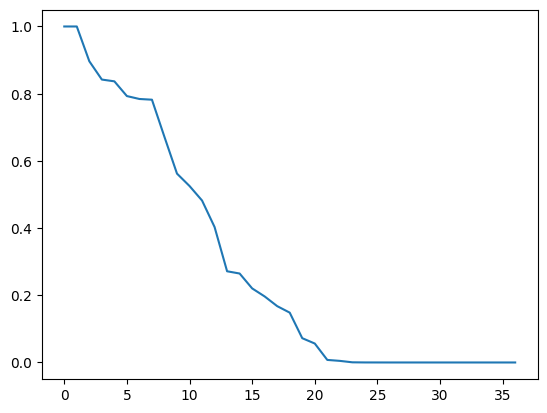

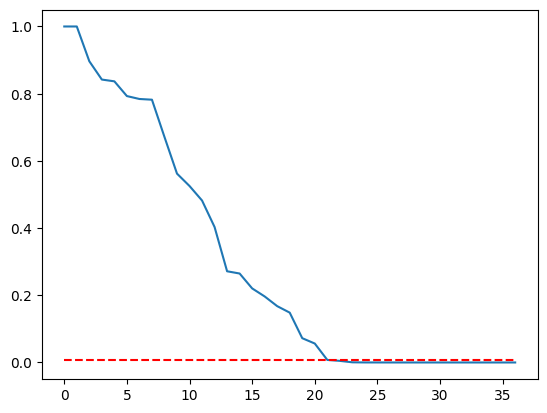

/home/yspark/driving-teacher-ai/dags/model_train_deploy/lib/simulator_02.py:878: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.hierarchy_sample_data[key] = pd.concat([self.hierarchy_sample_data[key],
/home/yspark/driving-teacher-ai/dags/model_train_deploy/lib/simulator_02.py:878: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.hierarchy_sample_data[key] = pd.concat([self.hierarchy_sample_data[key],
/home/yspark/driving-teacher-ai/dags/model_train_deploy/lib/simulator_02.py:878: FutureWar

In [1]:
from model_train_deploy.lib.simulator_02 import Simulator_01
db_info = {'host': '163.152.172.163',
          'port': '5432',
          'db_name': 'postgres',
          'user_name': 'tgsociety',
          'password': 'tgsociety'}

execution_date = '2024-05-01 12:00:00+09'
simulator = Simulator_01(위치데이터_path = '../기초작업/data/강남3구_집계구_경계_중심.pickle', 
                             simulation_start_dt = '2024-05-01', 
                             simulation_end_dt = '2026-05-10',
                             data_end_date = execution_date,
                             db_info = db_info,
                             is_first = True)

In [19]:
import pickle
위치데이터_path = 'daily_push/data/Gangnam3Districts_Boundary_Center.pickle'
with open(위치데이터_path, 'rb') as f:
    강남3구_집계구_경계_중심 = pickle.load(f)
강남3구_집계구_경계_중심

,gu,TOT_REG_CD,geometry,count,centroid
0,11220,11220520010107,"POLYGON ((127.02654 37.48948, 127.02601 37.489...",53.0,POINT (127.02621 37.48978)
1,11220,11220590020102,"POLYGON ((127.00201 37.5079, 127.00223 37.5074...",54.0,POINT (127.00173 37.50763)
2,11220,11220670020002,"POLYGON ((127.03551 37.46515, 127.03539 37.464...",114.0,POINT (127.0478 37.44425)
3,11220,11220680030001,"POLYGON ((127.07618 37.45624, 127.07639 37.456...",116.0,POINT (127.06819 37.44481)
4,11220,11220540010106,"POLYGON ((127.02177 37.50081, 127.02166 37.500...",60.0,POINT (127.02117 37.50097)
...,...,...,...,...,...
3067,11240,11240540010801,"POLYGON ((127.14493 37.48965, 127.14463 37.488...",146.0,POINT (127.14401 37.48973)
3068,11240,11240590030105,"POLYGON ((127.14341 37.51721, 127.14356 37.517...",63.0,POINT (127.14088 37.51645)
3069,11240,11240590040102,"POLYGON ((127.13568 37.51516, 127.13544 37.514...",51.0,POINT (127.13466 37.51537)
3070,11240,11240820010202,"POLYGON ((127.14042 37.48346, 127.14018 37.482...",66.0,POINT (127.13148 37.47358)


In [20]:
강남3구_집계구_경계_중심.columns = ['행정구_id', '집계구_id', '경계', '수요인구', '중심']

강남3구_집계구_경계_중심['경계'] = 강남3구_집계구_경계_중심['경계'].to_crs(epsg = 4326)
강남3구_집계구_경계_중심['중심'] = 강남3구_집계구_경계_중심['중심'].to_crs(epsg = 4326)
강남3구_집계구_경계_중심 = 강남3구_집계구_경계_중심.set_geometry("중심")
강남3구_집계구_경계_중심

,행정구_id,집계구_id,경계,수요인구,중심
0,11220,11220520010107,"POLYGON ((127.02654 37.48948, 127.02601 37.489...",53.0,POINT (127.02621 37.48978)
1,11220,11220590020102,"POLYGON ((127.00201 37.5079, 127.00223 37.5074...",54.0,POINT (127.00173 37.50763)
2,11220,11220670020002,"POLYGON ((127.03551 37.46515, 127.03539 37.464...",114.0,POINT (127.0478 37.44425)
3,11220,11220680030001,"POLYGON ((127.07618 37.45624, 127.07639 37.456...",116.0,POINT (127.06819 37.44481)
4,11220,11220540010106,"POLYGON ((127.02177 37.50081, 127.02166 37.500...",60.0,POINT (127.02117 37.50097)
...,...,...,...,...,...
3067,11240,11240540010801,"POLYGON ((127.14493 37.48965, 127.14463 37.488...",146.0,POINT (127.14401 37.48973)
3068,11240,11240590030105,"POLYGON ((127.14341 37.51721, 127.14356 37.517...",63.0,POINT (127.14088 37.51645)
3069,11240,11240590040102,"POLYGON ((127.13568 37.51516, 127.13544 37.514...",51.0,POINT (127.13466 37.51537)
3070,11240,11240820010202,"POLYGON ((127.14042 37.48346, 127.14018 37.482...",66.0,POINT (127.13148 37.47358)


In [21]:
강남3구_집계구_경계_중심.to_postgis('관리_info_집계구', simulator.db_handler.engine, if_exists='replace', schema='datamart')

In [7]:
simulator.data.sort_values('예약희망일시').reset_index(drop=True).loc[0, '예약희망일시']

Timestamp('2022-06-28 10:00:00+0900', tz='Asia/Seoul')

In [4]:
simulator.cluster.군집s

{"[('01', '0', False, '심야'), ('01', '0', True, '심야'), ('01', '1', False, '심야'), ('01', '1', True, '심야'), ('01', '2', False, '심야'), ('01', '2', True, '심야'), ('01', '3', False, '심야'), ('01', '3', True, '심야'), ('01', '4', False, '심야'), ('01', '4', True, '심야'), ('01', '5', False, '심야'), ('01', '5', True, '심야'), ('01', '6', False, '심야'), ('01', '6', True, '심야'), ('02', '0', False, '심야'), ('02', '0', True, '심야'), ('02', '1', False, '심야'), ('02', '1', True, '심야'), ('02', '2', False, '심야'), ('02', '2', True, '심야'), ('02', '3', False, '심야'), ('02', '3', True, '심야'), ('02', '4', False, '심야'), ('02', '4', True, '심야'), ('02', '5', False, '심야'), ('02', '5', True, '심야'), ('02', '6', False, '심야'), ('02', '6', True, '심야'), ('03', '0', False, '심야'), ('03', '0', True, '심야'), ('03', '1', False, '심야'), ('03', '1', True, '심야'), ('03', '2', False, '심야'), ('03', '2', True, '심야'), ('03', '3', False, '심야'), ('03', '3', True, '심야'), ('03', '4', False, '심야'), ('03', '4', True, '심야'), ('03', '5', False, '심야'), ('

In [40]:
import pandas as pd
path = 'daily_push/data/2023년기준_2022년_성연령별인구.txt'
data = pd.read_table(path, sep = '^', header = None)
data
data[1] = data[1].astype(str)

In [41]:
data2 = data[data[2].isin(['in_age_006', 'in_age_007', 'in_age_008'])].groupby(1)[3].sum().reset_index()

# 열 이름 변경
data2.columns = ['집계구_id', 'count']
data2

,집계구_id,count
0,11010530010001,115.0
1,11010530020001,89.0
2,11010530020002,124.0
3,11010530020003,80.0
4,11010530020004,107.0
...,...,...
101524,39020620020002,58.0
101525,39020620020003,39.0
101526,39020620020004,89.0
101527,39020620020007,75.0


In [27]:
import geopandas as gpd
tmp_path = 'daily_push/data/bnd_oa_00_2023_2023_2Q.shp'
tmp_df = gpd.read_file(tmp_path)
tmp_df['centroid'] = tmp_df['geometry'].centroid
tmp_df

,BASE_DATE,ADM_CD,TOT_REG_CD,geometry,centroid
0,20230701,11080650,11080650020002,"POLYGON ((954470.101 1959788.502, 954491.157 1...",POINT (955074.313 1958698.487)
1,20230701,11150700,11150700010802,"POLYGON ((943692.549 1945825.335, 943604.782 1...",POINT (943634.339 1945834.977)
2,20230701,11150710,11150710010802,"POLYGON ((945291.653 1948668.427, 945235.074 1...",POINT (945253.552 1948680.377)
3,20230701,11190760,11190760020402,"POLYGON ((945527.027 1946910.978, 945526.144 1...",POINT (945461.137 1946902.806)
4,20230701,11190760,11190760021801,"POLYGON ((946299.867 1946589.521, 946412.131 1...",POINT (946338.452 1946557.797)
...,...,...,...,...,...
103913,20230701,39020600,39020600080001,"MULTIPOLYGON (((903881.311 1471193.078, 903882...",POINT (903479.374 1471772.267)
103914,20230701,39020620,39020620020012,"MULTIPOLYGON (((895003.222 1471426.973, 895001...",POINT (895106.63 1471575.196)
103915,20230701,39010320,39010320020006,"MULTIPOLYGON (((891952.441 1548918.26, 891951....",POINT (891648.137 1552190.52)
103916,20230701,39010660,39010660070205,"POLYGON ((904457.966 1499987.377, 904490.698 1...",POINT (904356.728 1499878.242)


In [52]:
tmp = pd.merge(data2, tmp_df, how = 'left', left_on = '집계구_id', right_on = 'TOT_REG_CD')
tmp2 = tmp.loc[:, ['집계구_id', 'geometry', 'count', 'centroid']]
tmp2.columns = ['집계구_id', '경계', '수요인구', '중심']
tmp3 = gpd.GeoDataFrame(tmp2)
tmp3['경계'] = tmp3['경계'].to_crs(epsg=4326)
tmp3['중심'] = tmp3['중심'].to_crs(epsg=4326)
tmp3 = tmp3.set_geometry("중심")
tmp3

,집계구_id,경계,수요인구,중심
0,11010530010001,"POLYGON ((126.97407 37.57749, 126.97407 37.577...",115.0,POINT (126.97301 37.57778)
1,11010530020001,"POLYGON ((126.97112 37.57832, 126.97118 37.578...",89.0,POINT (126.97103 37.57679)
2,11010530020002,"POLYGON ((126.97033 37.57912, 126.97039 37.579...",124.0,POINT (126.9701 37.57792)
3,11010530020003,"POLYGON ((126.96645 37.57883, 126.96647 37.578...",80.0,POINT (126.96516 37.57704)
4,11010530020004,"POLYGON ((126.96903 37.57626, 126.9693 37.5760...",107.0,POINT (126.96654 37.57528)
...,...,...,...,...
101524,39020620020002,"POLYGON ((126.3824 33.24134, 126.38298 33.2413...",58.0,POINT (126.3803 33.2378)
101525,39020620020003,"POLYGON ((126.39204 33.25017, 126.3921 33.2500...",39.0,POINT (126.39161 33.24866)
101526,39020620020004,"POLYGON ((126.40383 33.25076, 126.40395 33.250...",89.0,POINT (126.39731 33.25328)
101527,39020620020007,"POLYGON ((126.3723 33.26516, 126.3723 33.26514...",75.0,POINT (126.38201 33.25476)


In [53]:
tmp3.to_postgis('관리_info_집계구', simulator.db_handler.engine, if_exists='replace', schema='datamart')

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
num_구s = ['11220', '11230', '11240']
data_frontiers = []
data_frontier = pd.DataFrame()
data_인구 = pd.DataFrame()
# pd.read_table('./raw_data/stat/11220_2022년_성연령별인구.txt', sep = '^', header = None)
for num_구 in num_구s:
    data_frontiers.append(gpd.read_file('./raw_data/frontier'+num_구+'/bnd_oa_'+num_구+'_2023_2023_2Q.shp'))
    data_frontiers[-1]['gu'] = str(num_구)
    data_frontier = pd.concat([data_frontier, data_frontiers[-1][['gu', 'TOT_REG_CD', 'geometry']]]).reset_index(drop = True)

    data_인구 = pd.concat([data_인구, pd.read_table('./raw_data/stat/'+num_구+'_2022년_성연령별인구.txt', sep = '^', header = None, names = ['year', 'TOT_REG_CD', 'sex_age_code', 'count'])]).reset_index(drop = True)
data_인구 = data_인구.loc[(data_인구['sex_age_code'] == 'in_age_006')|(data_인구['sex_age_code'] == 'in_age_007')|(data_인구['sex_age_code'] == 'in_age_008'), :]
data_인구 = data_인구.groupby('TOT_REG_CD').agg({'count': 'sum'}).reset_index()
data_인구['TOT_REG_CD'] = data_인구['TOT_REG_CD'].astype(str)
종합데이터 = data_frontier.merge(data_인구, how = 'left', on = 'TOT_REG_CD')
종합데이터['centroid'] = 종합데이터['geometry'].centroid
종합데이터['centroid'] = 종합데이터['centroid'].to_crs(epsg=4326)
종합데이터['geometry'] = 종합데이터['geometry'].to_crs(epsg=4326)

data_frontiers[-1]
